<a href="https://colab.research.google.com/github/lukaszplust/Projects/blob/main/Diabetes_random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import pdb

In [2]:
df = pd.read_csv('diabetes.csv')
df_copy = df.copy(deep=True)

In [3]:
df

# pragnancies -> number of time pregnant

#Glucose -> plasma glucose after 2 hours in an oral glucose tolerance test

# Blood Pressure -> diastolic blood presure

# Skin Thickness -> triceps skin fold thickness (mm)

# Insulin -> 2 hours serum insulin (mu U/ml)

# BMI -> body mass index

# Diabetes Pedirgree Function -> genetic predisposision to type 2 diabetes

# age -> age in years

# outcome -> class variable 0 or 1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
print(f'Number of rows and columns : {df.shape}')
print('-------------------------------')
print(f'Columns names : {df.columns}')
print('-------------------------------')
print(f'Types of columns: {df.dtypes}')

Number of rows and columns : (768, 9)
-------------------------------
Columns names : Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')
-------------------------------
Types of columns: Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


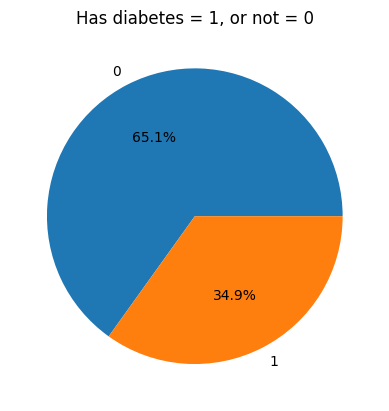

In [10]:
import matplotlib.pyplot as plt

# Obliczanie liczby wystąpień dla każdej kategorii
outcome_counts = df['Outcome'].value_counts()

# Tworzenie wykresu kołowego
plt.pie(outcome_counts, labels=outcome_counts.index, autopct='%1.1f%%')

# Opcjonalnie można dodać tytuł wykresu
plt.title('Has diabetes = 1, or not = 0')

# Wyświetlenie wykresu
plt.show()

In [11]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [12]:
df_copy[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']] = df_copy[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction']].replace(0,np.NaN)

df_copy.isnull().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

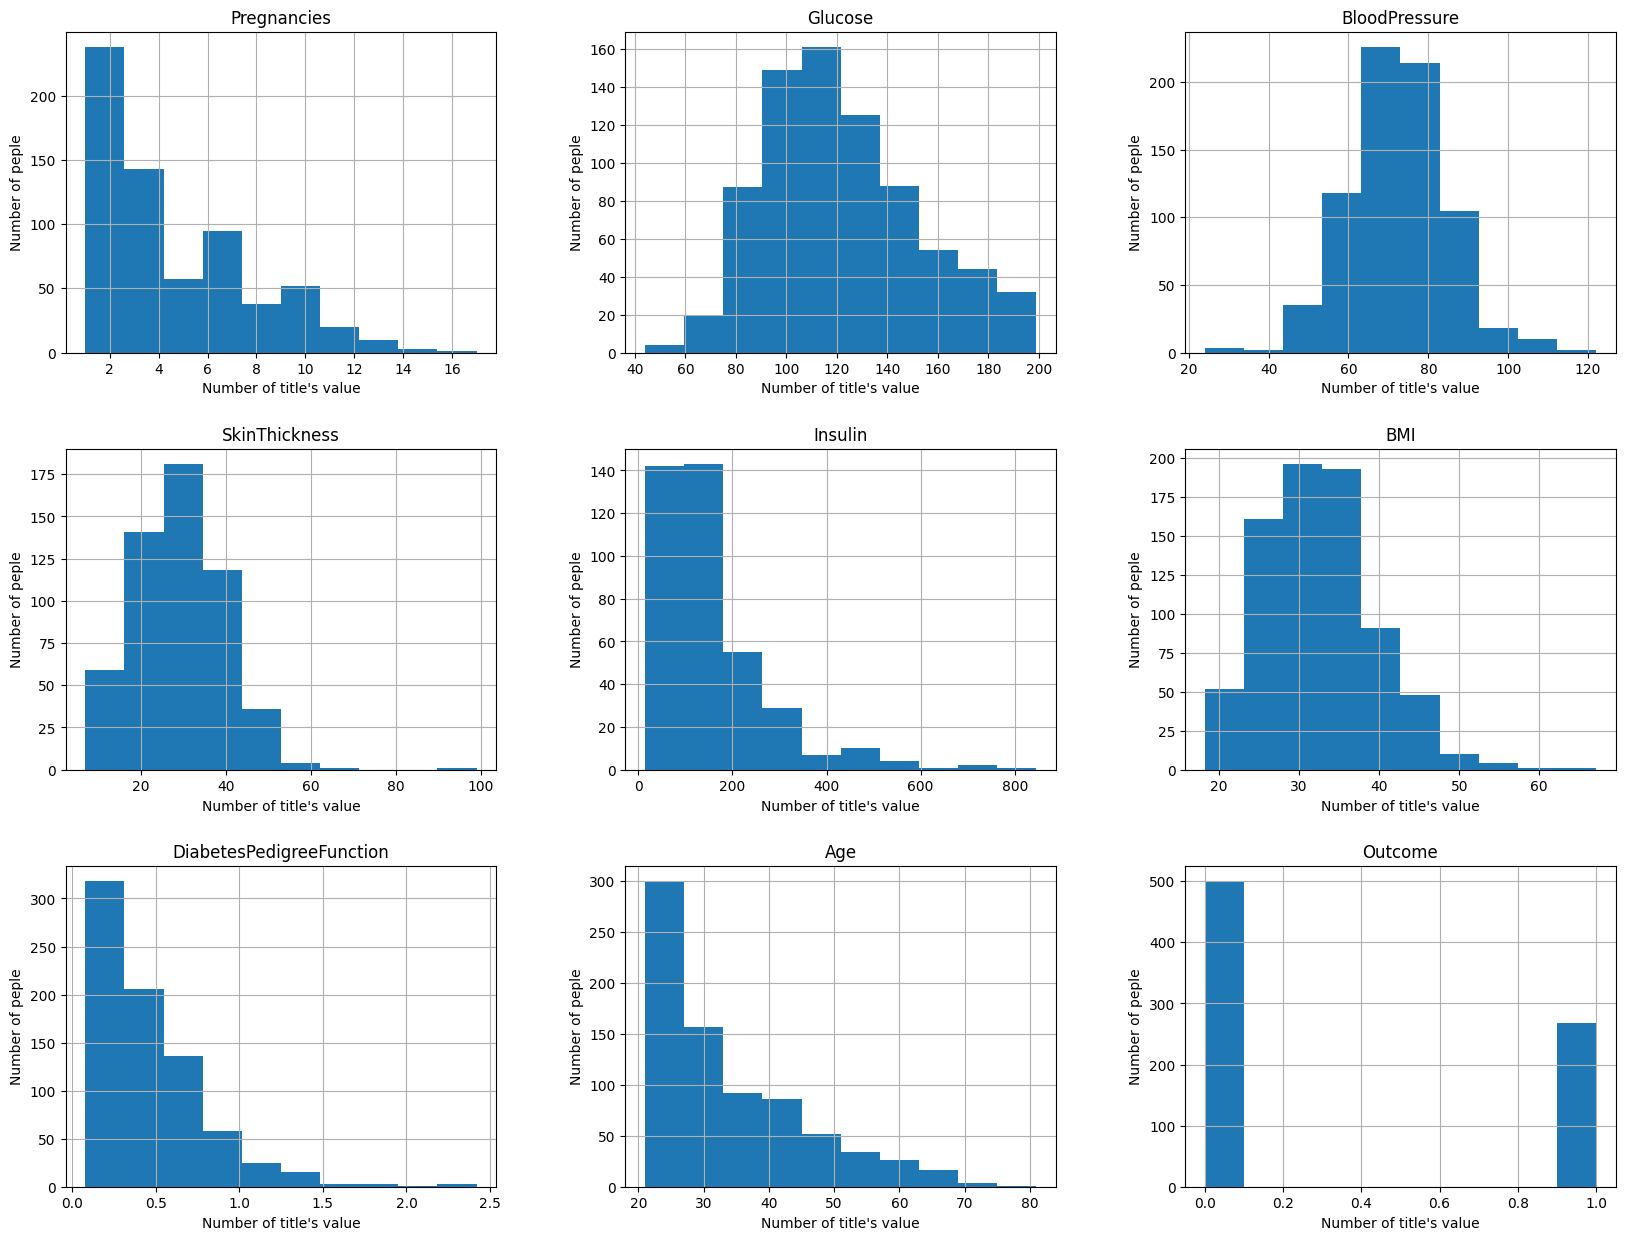

In [13]:
hist = df_copy.hist(figsize = (20,15))

for ax in hist.flatten():
    ax.set_xlabel("Number of title's value")
    ax.set_ylabel("Number of peple")
columns_to_fill = ['Pregnancies','Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI','DiabetesPedigreeFunction']

#replacing NaN values as median
for column in columns_to_fill:
    df_copy[column].fillna(df_copy[column].median(), inplace=True)

# Wyświetlanie histogramów
plt.show()

Building Model

In [14]:
from sklearn.model_selection import train_test_split

data = df.drop('Outcome', axis=1)

target = df['Outcome']

#podział na zbiór treningowy i testowy (model go nie widzi)
X_train, X_test, y_train, y_test = train_test_split(data,target, test_size=0.25)

In [15]:
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_train shape: {y_train.shape}')
print('-------------------------')
print(f'Data shape: {data.shape}')
print(f'Target shape: {target.shape}')

X_train shape: (576, 8)
X_test shape: (192, 8)
y_train shape: (576,)
y_train shape: (576,)
-------------------------
Data shape: (768, 8)
Target shape: (768,)


In [24]:
def find_best_model(data, target):

    models = {
        'random_forest': {
            'model': RandomForestClassifier(criterion='gini'),
            'parameters': {
                'n_estimators': [5,10,30,50,100,200,300] # ile drzew ma być zbudowanych w procesie tworzenia modelu
            }
        },

        'decision_tree': {
            'model': DecisionTreeClassifier(splitter='best'),
            'parameters': {
                'criterion': ['gini', 'entropy'],
                'max_depth': [2,5,10,25,50]
            }
        },
    }

    scores = []

    # model_name -> logistic_regression
    # model_params -> {'model': LogisticRegression(solver='liblinear'), 'parameters': {'C': [1, 5, 10, 15, 20]}}
    #pdb.set_trace()
    for model_name, model_params in models.items():
        gs = GridSearchCV(model_params['model'], model_params['parameters'], cv=5) # cv -> liczba przedziałow fold w procedurze walidacji krzyzowej (cross - validation)
        # GridSearchCV -> automatycznie testuje wszystkie kombiancje na podsatwie okreslionej miary oceny (domyslnie = srednie wynikowanie walidacji krzyzowej)

        gs.fit(data, target) # trenowanie modelu dla kazdej kombinacji parametrów


        scores.append({
            'model': model_name, # model name
            'best_parameters': gs.best_params_, # best parameters
            'score': gs.best_score_ # najlepszy wynik oceny osiagniety dla danego modelu
        })

    return pd.DataFrame(scores, columns=['model', 'best_parameters', 'score'])

find_best_model(X_train, y_train)

,model,best_parameters,score
0,random_forest,{'n_estimators': 300},0.772639
1,decision_tree,"{'criterion': 'gini', 'max_depth': 2}",0.748261


Linear Regression

In [25]:
print(f'Dla zbioru treningowego: {linear.score(X_train, y_train)}')
print(f'Dla zbioru testowego: {linear.score(X_test, y_test)}')

Dla zbioru treningowego: 0.28975792746221296
Dla zbioru testowego: 0.31105163035454675


In [26]:
classifier = RandomForestClassifier(n_estimators =300, random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=300, random_state=0)

In [27]:
def prediction(Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age):

  pregnancies = int(Pregnancies)
  glucose = float(Glucose)
  blood = float(BloodPressure)
  skin = float(SkinThickness)
  insulin = float(Insulin)
  bmi = float(BMI)
  DPF = float(DiabetesPedigreeFunction)
  age = int(Age)

  data = [[pregnancies,glucose,blood,skin,insulin,bmi,DPF,age]]
  return classifier.predict(data)

In [29]:
# input: Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
#pdb.set_trace()
# 0 -> means has no diabetes

# 1 -> means has diabetes
print(prediction(0,86,72,15,80,32,0.3725,22))
print(prediction(1,117,88,24,145,34.5,0.403,40))

[0]
[1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
